In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../scripts")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (14,6)

In [52]:
obs = pd.read_csv("../data/obs-hunan.csv", parse_dates=["date"])
obs = obs.set_index("date")
obs = obs.drop(columns=["C"])
obs

,I,R,D
date,,,
2020-01-22,4,0,0
2020-01-23,6,0,0
2020-01-24,12,0,0
2020-01-25,20,0,0
2020-01-26,29,0,0
...,...,...,...
2020-06-05,0,1015,4
2020-06-06,0,1015,4
2020-06-07,0,1015,4


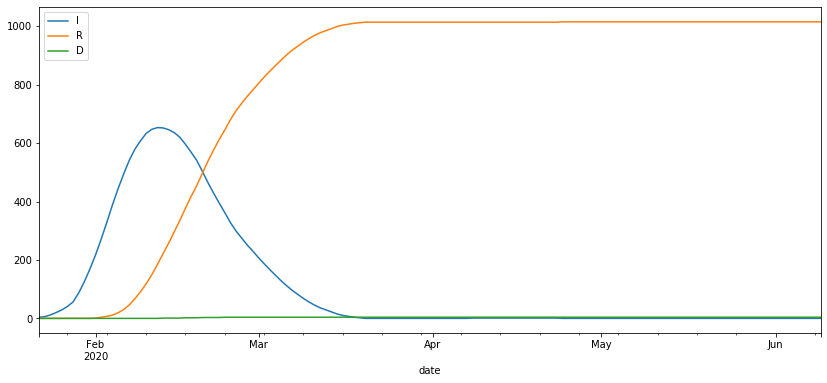

In [53]:
obs.plot()

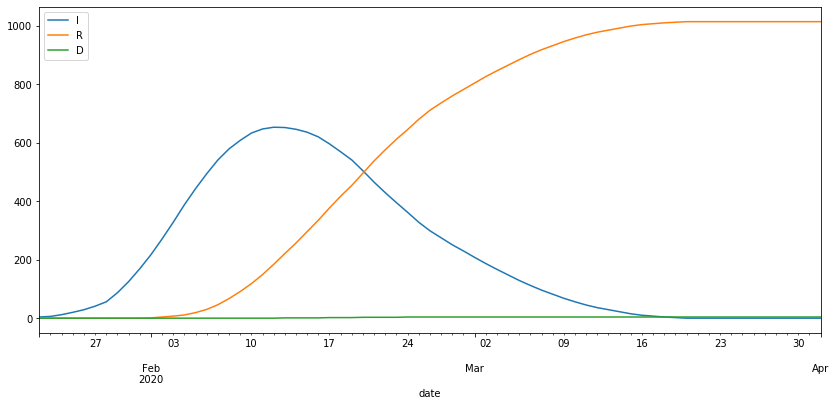

In [54]:
obs = obs[:"2020-04-01"]
obs.plot()

In [55]:
train = obs.iloc[:40]
test = obs.iloc[40:]

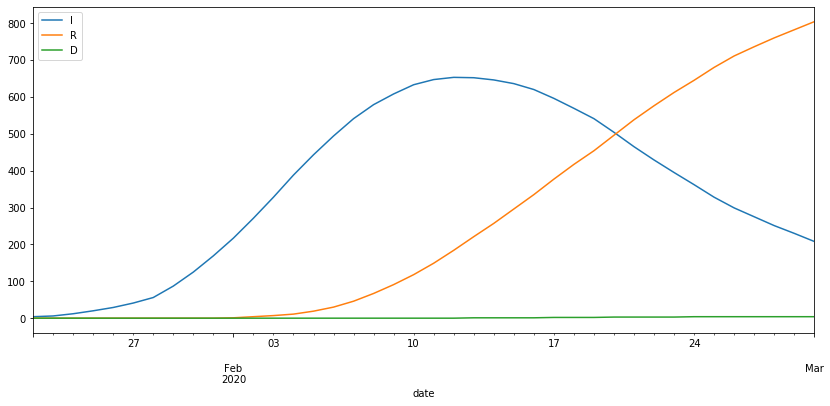

In [56]:
train.plot()

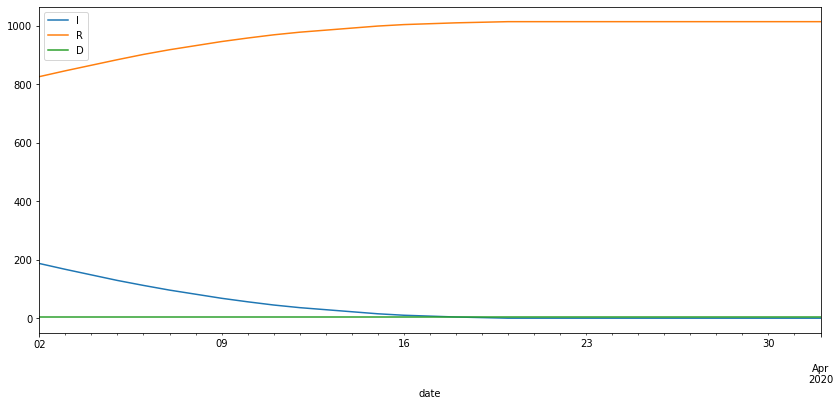

In [57]:
test.plot()

# Piecewise SIR

In [58]:
from SEIR import SIR

In [59]:
obs.head()

,I,R,D
date,,,
2020-01-22,4,0,0
2020-01-23,6,0,0
2020-01-24,12,0,0
2020-01-25,20,0,0
2020-01-26,29,0,0


In [60]:
model = SIR(population = 1e3, init_infected=4, init_recovered=0, init_dead=0)

In [61]:
model.fit_piecewise(train, estimate=('r_transmission', "r_recovery", "r_mortality", "population"), batch_size=7, keep_remainder=True)

----------------------
Batch 0

Fitting...
Simulating...
Done!
----------------------
Batch 1

Fitting...
Simulating...
Done!
----------------------
Batch 2

Fitting...
Simulating...
Done!
----------------------
Batch 3

Fitting...
Simulating...
Done!
----------------------
Batch 4

Fitting...
Simulating...
Done!


In [63]:
pred = model.simulate(len(test))
pred.index = test.index

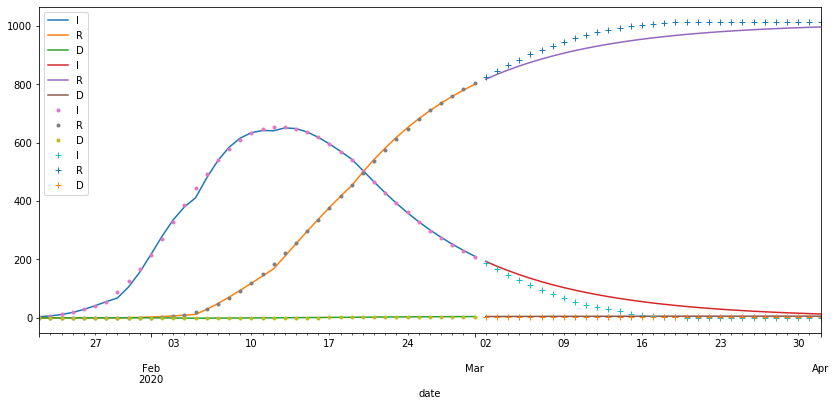

In [64]:
ax = model.y_fit.plot()
pred.plot(ax=ax)
train.plot(ax=ax, style=".")
test.plot(ax=ax, style="+")

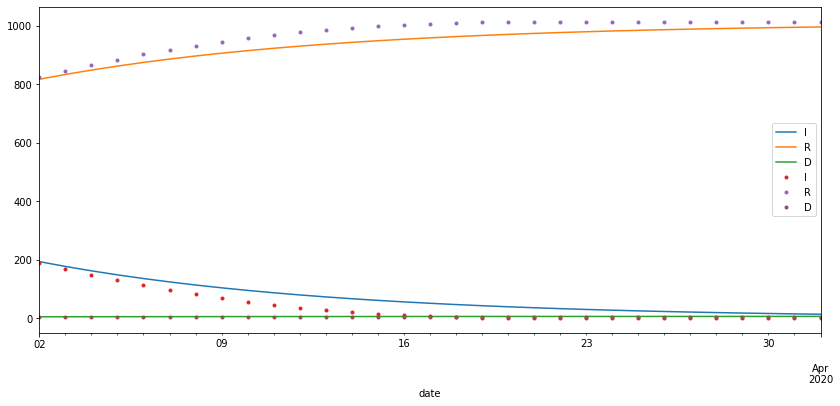

In [65]:
ax = pred.plot()
test.plot(ax=ax, style=".")

In [69]:
model.piecewise_params

,population,r_transmission,r_recovery,r_mortality
0,97.726909,0.578719,0.000924,0.002799
1,480.579245,0.546442,0.006892,-0.000863
2,878.601886,0.411830,0.038840,0.000326
3,1038.736431,0.419934,0.066073,0.000414
4,1015.355022,1.255132,0.088354,0.000625


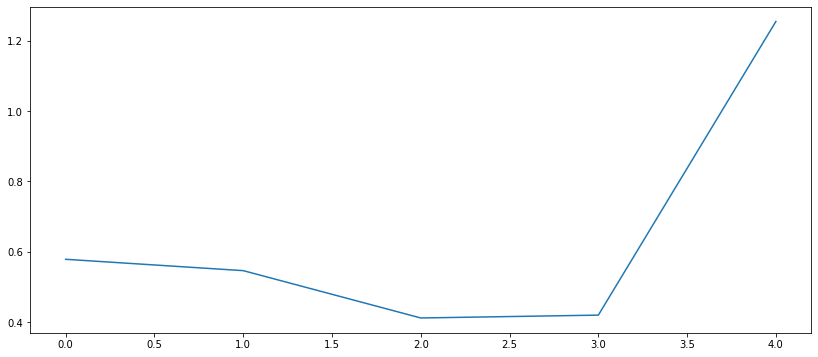

In [66]:
model.piecewise_params.r_transmission.plot()

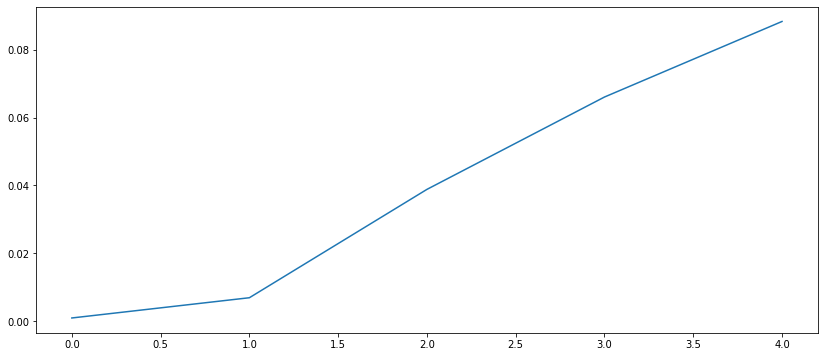

In [67]:
model.piecewise_params.r_recovery.plot()

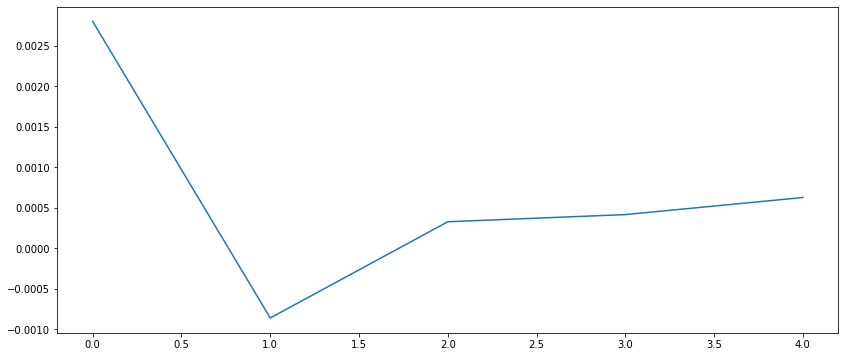

In [68]:
model.piecewise_params.r_mortality.plot()